In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, precision_recall_curve, auc
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectFromModel
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
import time

In [4]:
df = pd.read_csv('dataset_phishing_part1.csv')
df.head()

,url,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,http://www.crestonwood.com/router.php,37,19,0,3,0,0,0,0,0,...,0,1,0,45,-1,0,1,1,4,legitimate
1,http://shadetreetechnology.com/V4/validation/a...,77,23,1,1,0,0,0,0,0,...,1,0,0,77,5767,0,0,1,2,phishing
2,https://support-appleld.com.secureupdate.duila...,126,50,1,4,1,0,1,2,0,...,1,0,0,14,4004,5828815,0,1,0,phishing
3,http://rgipt.ac.in,18,11,0,2,0,0,0,0,0,...,1,0,0,62,-1,107721,0,0,3,legitimate
4,http://www.iracing.com/tracks/gateway-motorspo...,55,15,0,2,2,0,0,0,0,...,0,1,0,224,8175,8725,0,0,6,legitimate


In [5]:
df.shape

(11430, 89)

In [6]:
# To check the datatypes of the cols:
df.dtypes

url                object
length_url          int64
length_hostname     int64
ip                  int64
nb_dots             int64
                    ...  
web_traffic         int64
dns_record          int64
google_index        int64
page_rank           int64
status             object
Length: 89, dtype: object

In [7]:
# To check basic statistics:
df.describe()

,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,nb_eq,...,empty_title,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank
count,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.0,11430.000000,...,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,1.143000e+04,11430.000000,11430.000000,11430.000000
mean,61.126684,21.090289,0.150569,2.480752,0.997550,0.022222,0.141207,0.162292,0.0,0.293176,...,0.124759,0.775853,0.439545,0.072878,492.532196,4062.543745,8.567566e+05,0.020122,0.533946,3.185739
std,55.297318,10.777171,0.357644,1.369686,2.087087,0.155500,0.364456,0.821337,0.0,0.998317,...,0.330460,0.417038,0.496353,0.259948,814.769415,3107.784600,1.995606e+06,0.140425,0.498868,2.536955
min,12.000000,4.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,-1.000000,-12.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,33.000000,15.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,1.000000,0.000000,0.000000,84.000000,972.250000,0.000000e+00,0.000000,0.000000,1.000000
50%,47.000000,19.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,1.000000,0.000000,0.000000,242.000000,3993.000000,1.651000e+03,0.000000,1.000000,3.000000
75%,71.000000,24.000000,0.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,1.000000,1.000000,0.000000,449.000000,7026.750000,3.738455e+05,0.000000,1.000000,5.000000
max,1641.000000,214.000000,1.000000,24.000000,43.000000,4.000000,3.000000,19.000000,0.0,19.000000,...,1.000000,1.000000,1.000000,1.000000,29829.000000,12874.000000,1.076799e+07,1.000000,1.000000,10.000000


In [8]:
# Checking the count of how many are legitimate/phishing urls
df['status'].value_counts()

status
legitimate    5715
phishing      5715
Name: count, dtype: int64

In [9]:
df.isna().sum()

url                0
length_url         0
length_hostname    0
ip                 0
nb_dots            0
                  ..
web_traffic        0
dns_record         0
google_index       0
page_rank          0
status             0
Length: 89, dtype: int64

All NA values in the dataset are represented by -1:

In [10]:
print((df == -1).sum().sort_values(ascending=False))  # Count occurrences of -1 in each column

domain_age                    1781
domain_registration_length      46
url                              0
statistical_report               0
ratio_intErrors                  0
                              ... 
punycode                         0
ratio_digits_host                0
ratio_digits_url                 0
https_token                      0
status                           0
Length: 89, dtype: int64


In [11]:
print(df['domain_age'].median())
print(df['domain_registration_length'].median())

3993.0
242.0


In [12]:
# Replacing all -1 (NA) values with NA
df.replace(-1, np.nan, inplace=True)

# Fill domain_age 0 if missing means "new domain"
df['domain_age'] = df['domain_age'].fillna(0)

# Fill domain_registration_length with median
df['domain_registration_length'] = df['domain_registration_length'].fillna(df['domain_registration_length'].median())

In [13]:
sns.set_theme(style="whitegrid")
plt.style.use('fivethirtyeight')

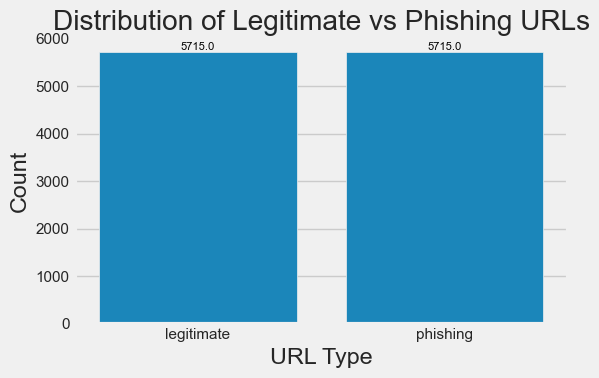

In [14]:
# Plot the class distribution

plt.figure(figsize=(6, 4))
ax = sns.countplot(x='status', data=df)
plt.title('Distribution of Legitimate vs Phishing URLs')
plt.xlabel('URL Type')
plt.ylabel('Count')

# Annotate the bars with their heights
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height() + 5), ha='center', va='bottom', fontsize=8, color='black')

plt.tight_layout()
plt.show()


 Distributions of key numerical features:


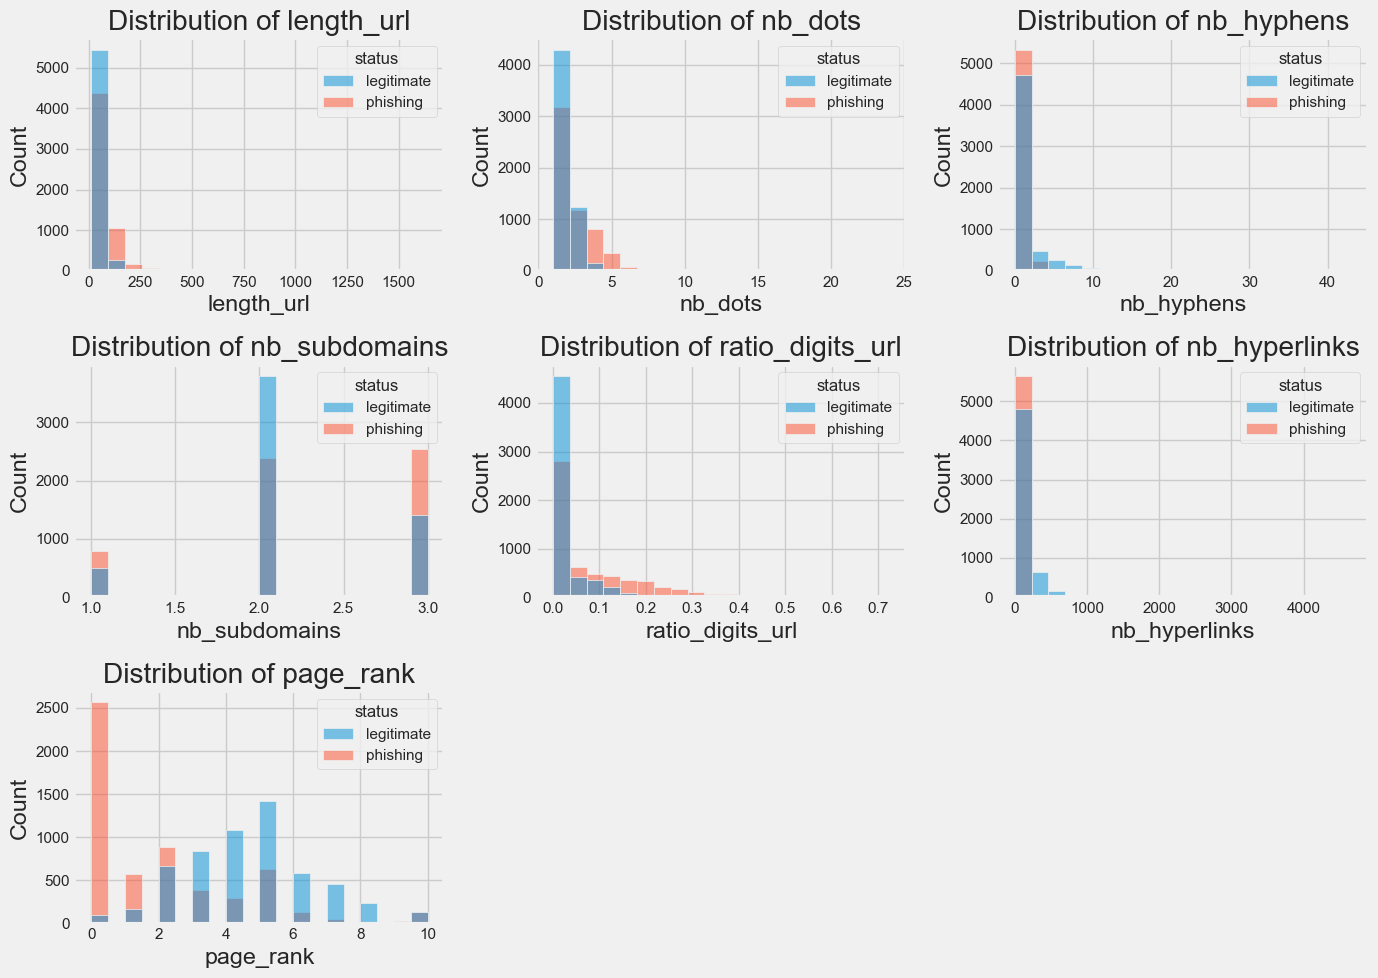

In [15]:
# Histogram of key numerical features
print("\n Distributions of key numerical features:")
numerical_features = ['length_url', 'nb_dots', 'nb_hyphens', 'nb_subdomains', 'ratio_digits_url', 'nb_hyperlinks', 'page_rank']

plt.figure(figsize=(14, 10))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(3, 3, i)
    sns.histplot(data=df, x=feature, hue='status', bins=20)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()


 Boxplots to identify outliers in key features:


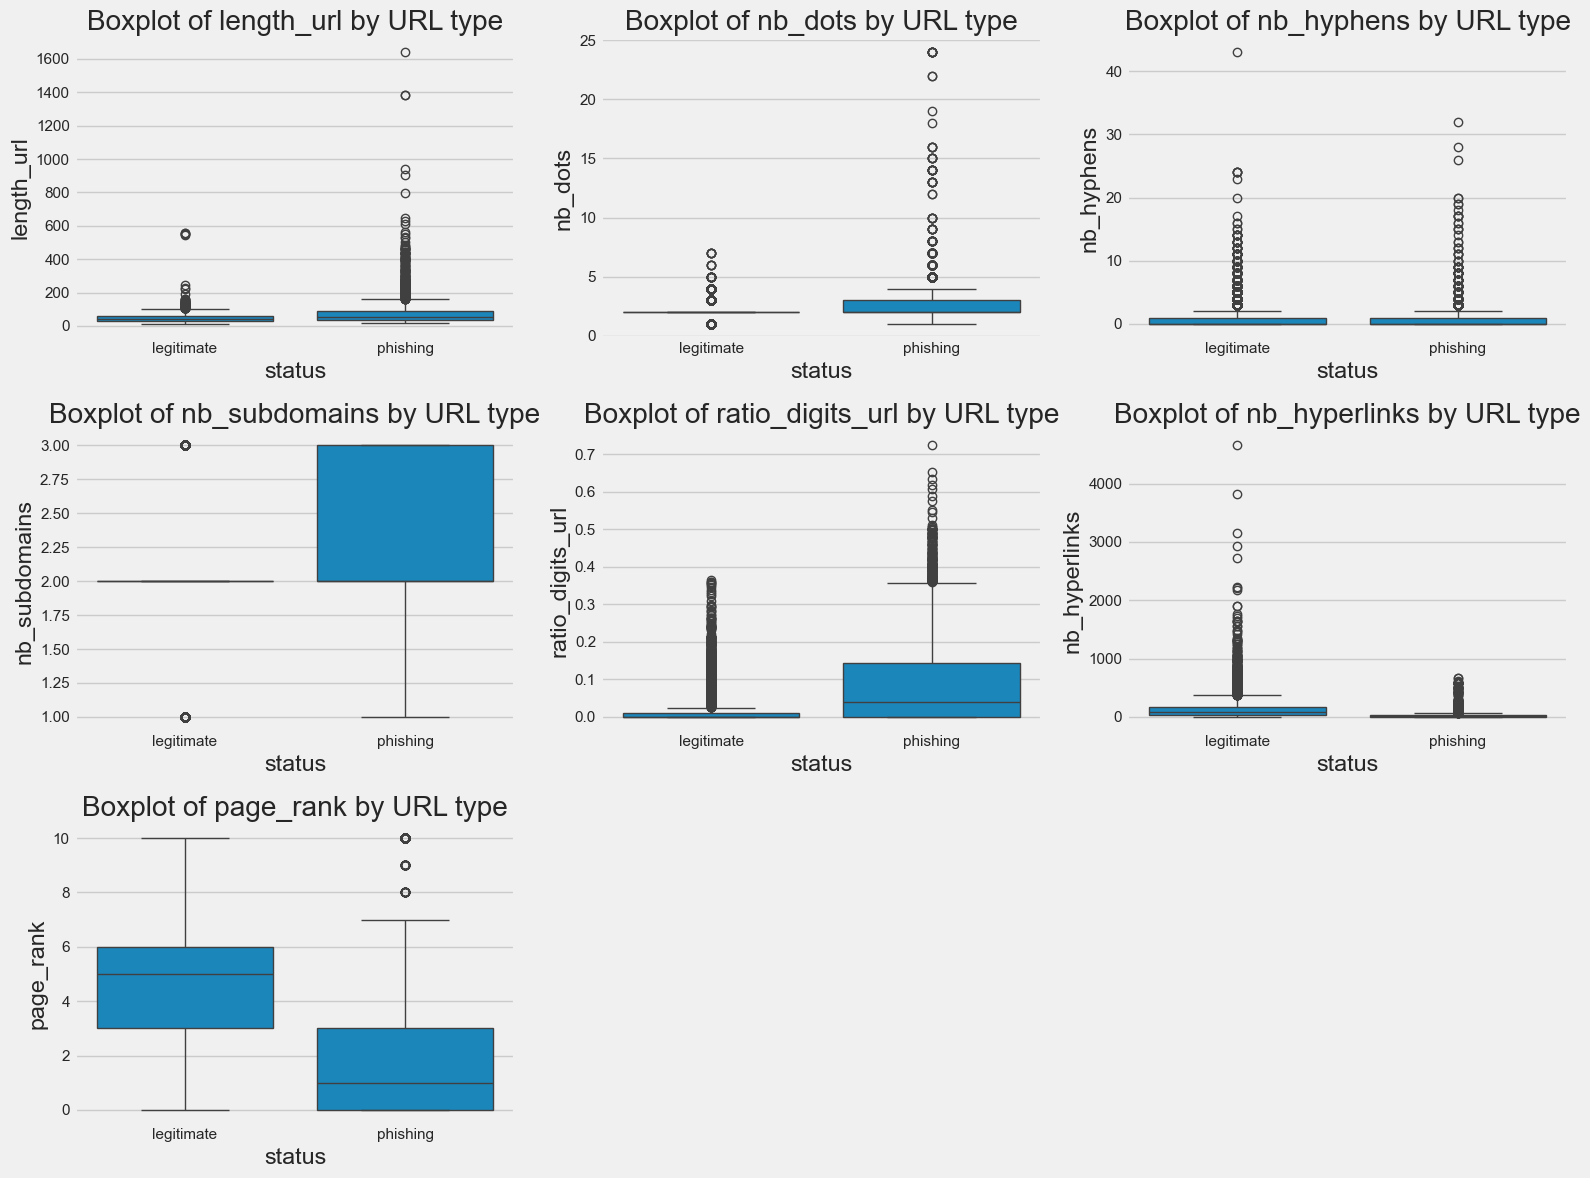

In [16]:
print("\n Boxplots to identify outliers in key features:")
plt.figure(figsize=(16, 12))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x='status', y=feature, data=df)
    plt.title(f'Boxplot of {feature} by URL type')
    
plt.tight_layout()
plt.show()

/var/folders/dq/qk8zdkks74s233j5sqv_tsb40000gn/T/ipykernel_94579/114622937.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df, x='length_url', hue='status', shade=True)


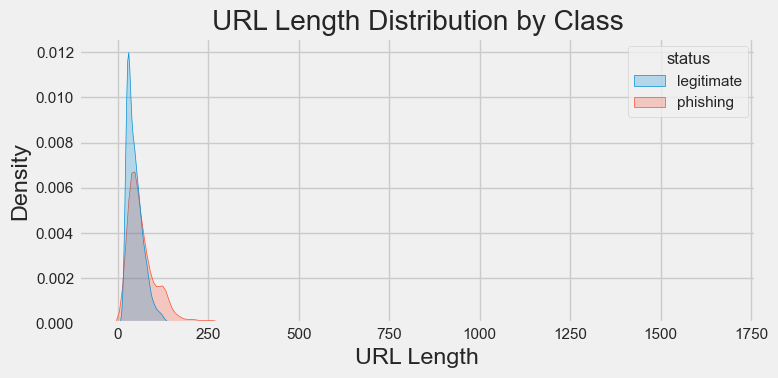

In [17]:
# URL length distribution by class
plt.figure(figsize=(8, 4))
sns.kdeplot(data=df, x='length_url', hue='status', shade=True)
plt.title('URL Length Distribution by Class')
plt.xlabel('URL Length')
plt.tight_layout()
plt.show()


 Binary features distribution by class:


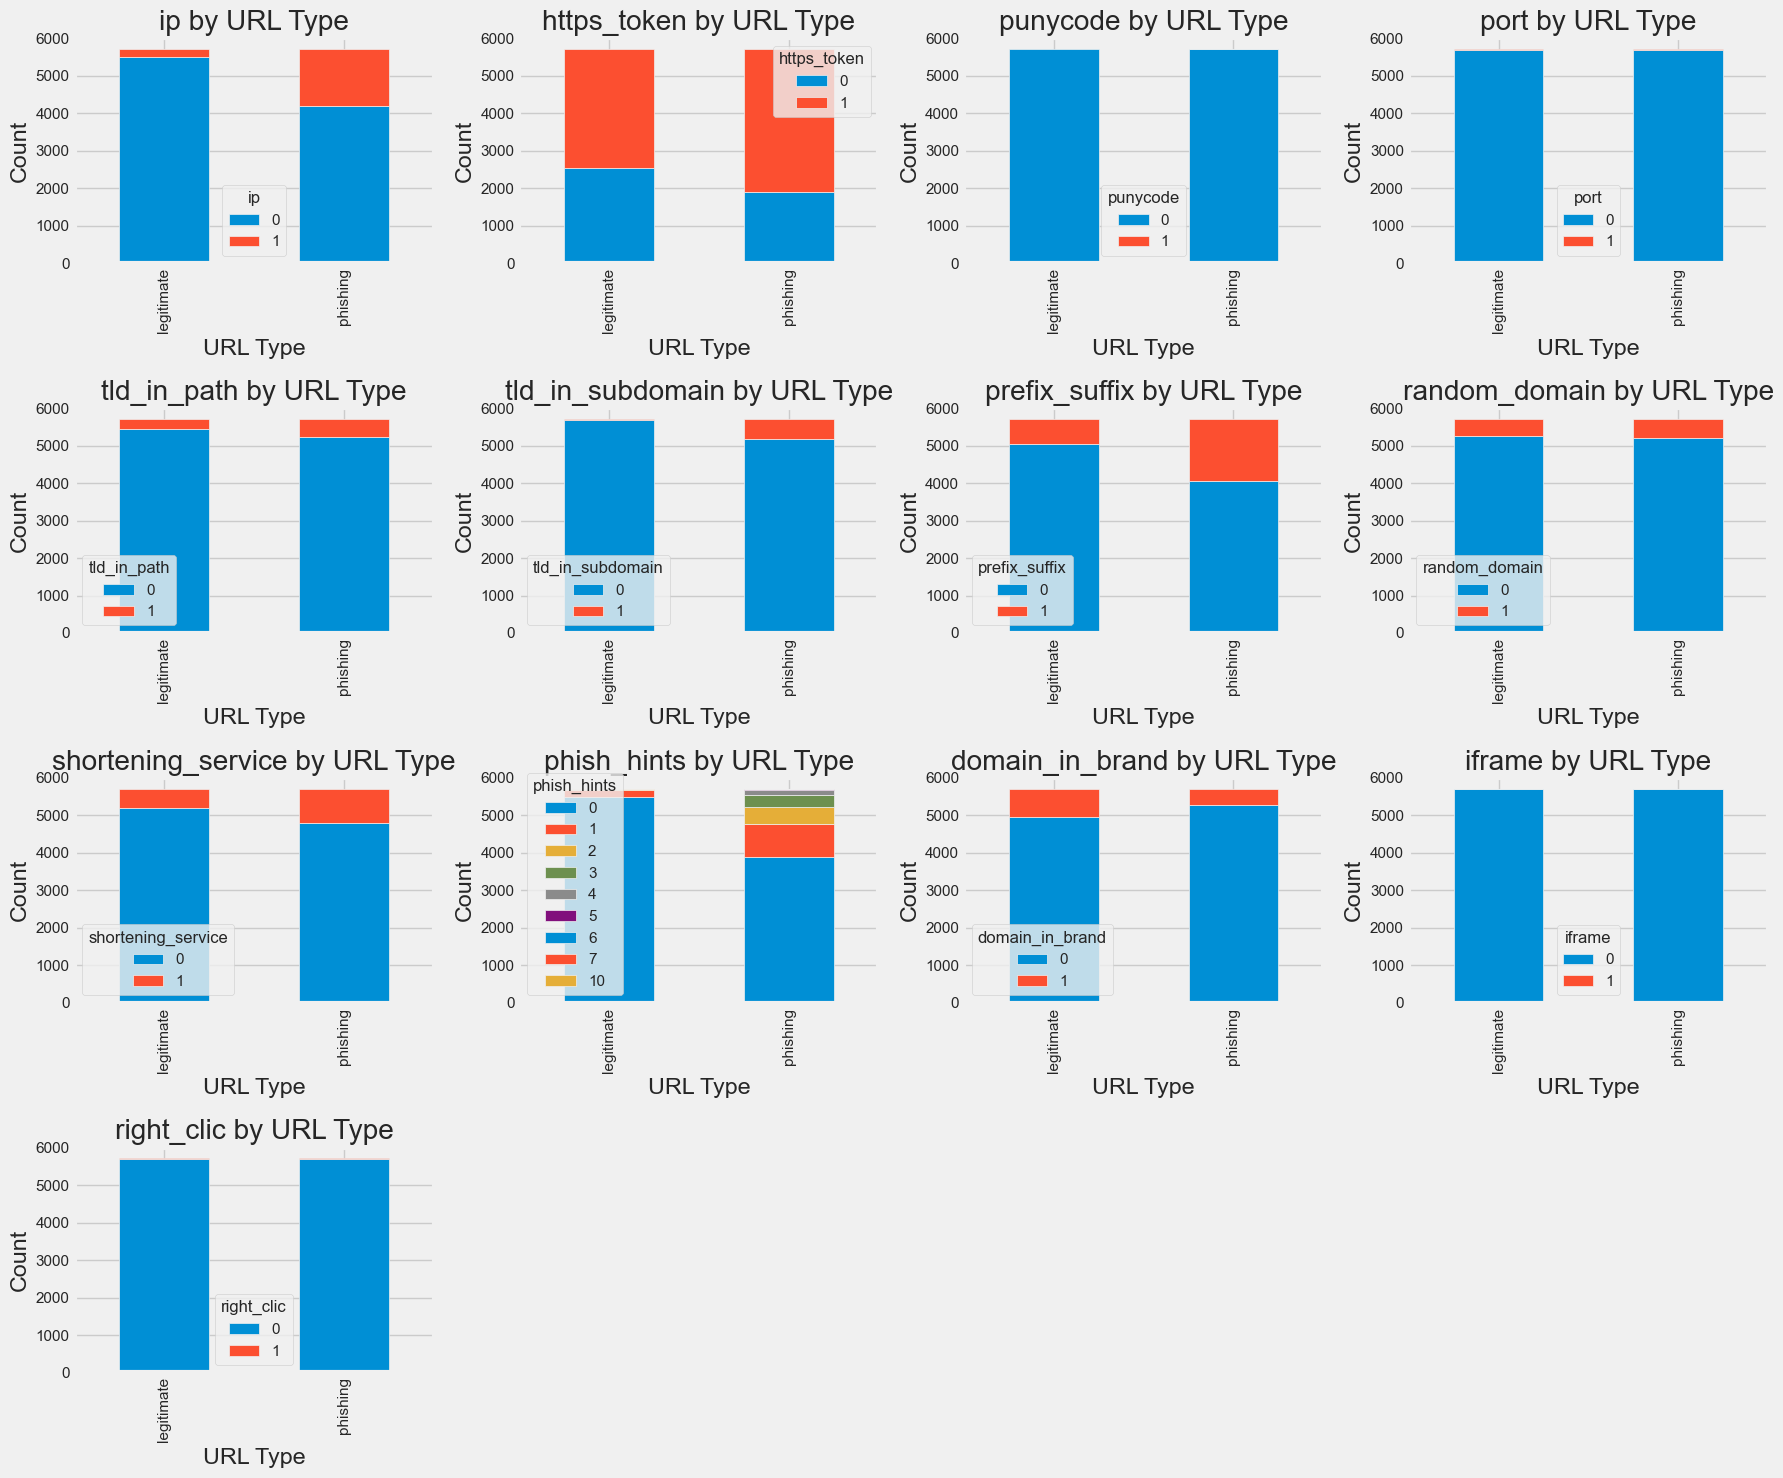

In [18]:
binary_features = ['ip', 'https_token', 'punycode', 'port', 'tld_in_path', 'tld_in_subdomain', 'prefix_suffix', 'random_domain', 'shortening_service', 
                   'phish_hints', 'domain_in_brand', 'iframe', 'right_clic']
    
print("\n Binary features distribution by class:")
plt.figure(figsize=(18, 15))
for i, feature in enumerate(binary_features, 1):
    if feature in df.columns:
        plt.subplot(4, 4, i)
        df_feature = df.groupby(['status', feature]).size().unstack()
        df_feature.plot(kind='bar', stacked=True, ax=plt.gca())
        plt.title(f'{feature} by URL Type')
        plt.xlabel('URL Type')
        plt.ylabel('Count')
plt.tight_layout()
plt.show()

In [19]:
# Converting the text ouputs to binary encodings representing scam -> 1, not scam -> 1

df['status'] = df['status'].map({'legitimate': 0, 'phishing': 1})

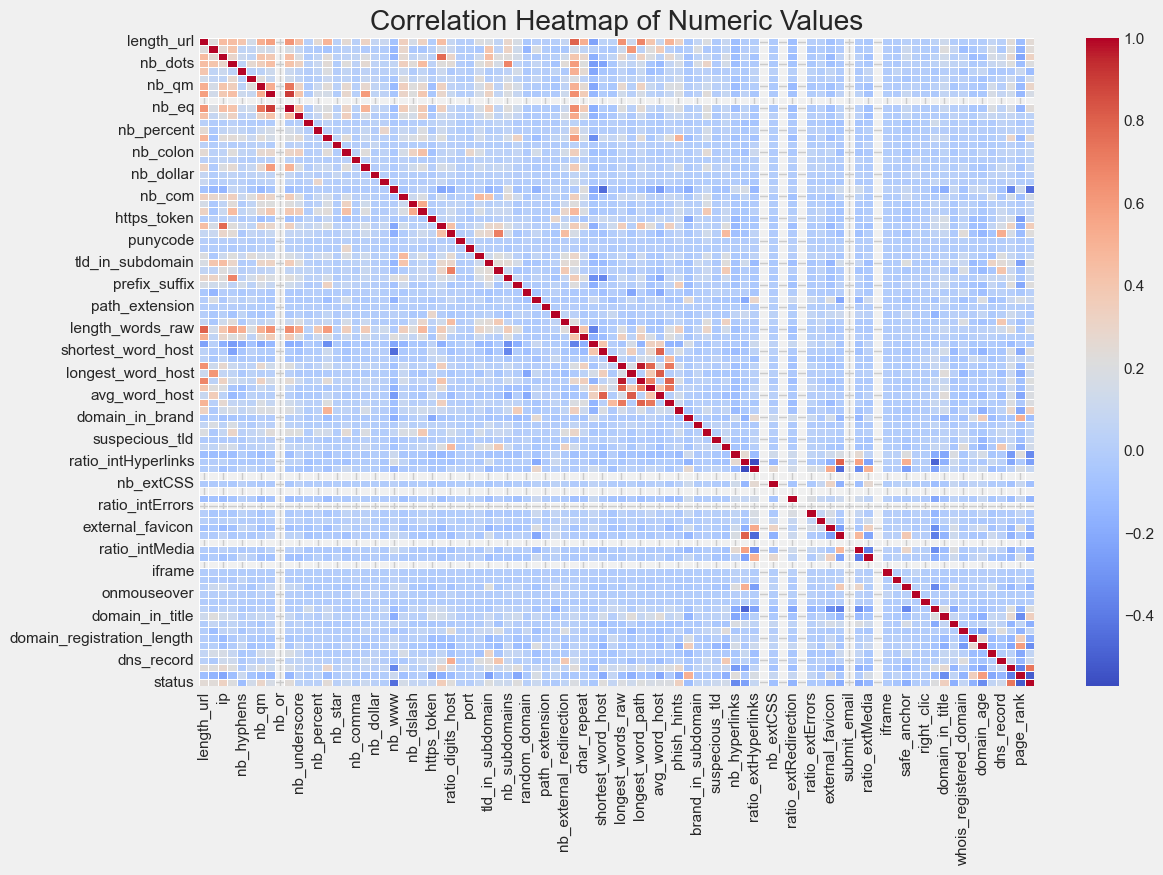

In [20]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

corr_matrix = df[numeric_cols].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', fmt=".f", linewidths=0.5)
plt.title("Correlation Heatmap of Numeric Values")
plt.show()

In [21]:
# Step 1: Feature selection based on correlation with status
corr_with_status = corr_matrix['status'].drop('status')
high_corr_features = corr_with_status[abs(corr_with_status) > 0.15].sort_values(ascending=False)
print(f"Selected {len(high_corr_features)} features based on correlation with status:")
print(high_corr_features)

Selected 35 features based on correlation with status:
google_index                  0.731171
ratio_digits_url              0.356395
domain_in_title               0.342807
phish_hints                   0.335393
ip                            0.321698
nb_qm                         0.294319
length_url                    0.248580
nb_slash                      0.242270
length_hostname               0.238322
nb_eq                         0.233386
ratio_digits_host             0.224335
shortest_word_host            0.223084
prefix_suffix                 0.214681
longest_word_path             0.212709
tld_in_subdomain              0.208884
empty_title                   0.207043
nb_dots                       0.207029
longest_words_raw             0.200147
avg_word_path                 0.197256
avg_word_host                 0.193502
length_words_raw              0.192010
nb_and                        0.170546
avg_words_raw                 0.167564
nb_com                        0.156284
ratio_ext

In [ ]:
def create_engineered_features(df):

    df_new = df.copy()
    
    # TLD (top level domain)-based features:
    suspicious_tlds = ['.xyz', '.tk', '.top', '.ml', '.ga', '.cf', '.gq', '.cc', '.pw']
    df_new['suspicious_tld'] = df_new['url'].apply(lambda x: 1 if any(x.lower().endswith(tld) for tld in suspicious_tlds) else 0)
    
    # URL length (dynamic threshold based on percentiles) : if length exceeds 80th percentile of dataset url length: flagged as scam
    url_length_threshold = np.percentile(df_new['length_url'], 80)  
    df_new['long_url'] = df_new['length_url'].apply(lambda x: 1 if x > url_length_threshold else 0)
    
    # Dots frequency (normalized by URL length)
    df_new['dots_density'] = df_new['nb_dots'] / df_new['length_url'].apply(lambda x: max(x, 1))
    dots_density_threshold = np.percentile(df_new['dots_density'], 80)
    df_new['high_dots_density'] = df_new['dots_density'].apply(lambda x: 1 if x > dots_density_threshold else 0)
    
    # IP address pattern
    df_new['ip_in_url'] = df_new['url'].apply(lambda x: 1 if re.search(r'(^|\D)(\d{1,3}\.\d{1,3}\.\d{1,3}\.\d{1,3})($|\D)', x) else 0)
    
    # Special characters
    df_new['has_at_symbol'] = df_new['url'].apply(lambda x: 1 if "@" in x else 0)
    df_new['has_dash'] = df_new['url'].apply(lambda x: 1 if "-" in x else 0)
    
    # Redirections
    redir_threshold = max(2, np.percentile(df_new['nb_redirection'], 80))
    df_new['many_redirections'] = df_new['nb_redirection'].apply(lambda x: 1 if x > redir_threshold else 0)
    
    # Misleading security indicators
    df_new['misleading_https'] = df.apply(lambda row: 1 if 'https' in row['url'].lower() and row['https_token'] == 0 else 0, axis=1)
    
    # Word-pattern features
    secure_keywords = ['secure', 'banking', 'login', 'update', 'account', 'verify', 'confirm', 'paypal', 'password']
    df_new['secure_keywords'] = df_new['url'].apply(lambda x: 1 if any(kw in x.lower() for kw in secure_keywords) else 0)
    
    # More complex pattern detection
    df_new['subdomain_depth'] = df_new['url'].apply(lambda x: len(re.findall(r'\.', x.split('/')[2])) if len(x.split('/')) > 2 else 0)
    
    # Age-related features (if domain is very new, it's suspicious)
    df_new['very_new_domain'] = df_new['domain_age'].apply(lambda x: 1 if x < 180 else 0)  # 180 days = ~6 months
    
    return df_new


In [23]:
df_enriched = create_engineered_features(df)

In [ ]:
engineered_features = [
    'suspicious_tld', 'long_url', 'dots_density', 'high_dots_density', 
    'ip_in_url', 'has_at_symbol', 'has_dash', 'many_redirections', 
    'misleading_https', 'secure_keywords', 'subdomain_depth', 'very_new_domain'
]

combined_features = list(high_corr_features)
for feature in engineered_features:
    if feature in df_enriched.columns and feature not in combined_features:
        combined_features.append(feature)

# Make sure all selected features exist
selected_features = [f for f in combined_features if f in df_enriched.columns]
print(f"Final selected features ({len(selected_features)}):")
print(selected_features)

Final selected features (12):
['suspicious_tld', 'long_url', 'dots_density', 'high_dots_density', 'ip_in_url', 'has_at_symbol', 'has_dash', 'many_redirections', 'misleading_https', 'secure_keywords', 'subdomain_depth', 'very_new_domain']


In [25]:
X = df_enriched[selected_features]
y = df_enriched['status']

In [26]:
# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=selected_features)

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled_df, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
# Function to evaluate and print model performance
def evaluate_model(name, classifier, X_train, X_test, y_train, y_test):
    start_time = time.time()
    
    classifier.fit(X_train, y_train)
    
    y_pred = classifier.predict(X_test)
    
    if hasattr(classifier, 'predict_proba'):
        y_pred_proba = classifier.predict_proba(X_test)[:, 1]
        roc_auc = roc_auc_score(y_test, y_pred_proba)
        
        # Calculate PR AUC
        precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
        pr_auc = auc(recall, precision)
    else:
        y_pred_proba = classifier.decision_function(X_test)
        roc_auc = roc_auc_score(y_test, y_pred_proba)
        
        # Calculate PR AUC
        precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
        pr_auc = auc(recall, precision)
    
    end_time = time.time()
    training_time = end_time - start_time
    
    # Calculate metrics
    acc = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred, output_dict=True)
    
    # Extract metrics from classification report
    precision = class_report['weighted avg']['precision']
    recall = class_report['weighted avg']['recall']
    f1 = class_report['weighted avg']['f1-score']
    
    # Print results
    print(f"\n{name} Performance:")
    print(f"Accuracy: {acc:.4f}")
    print(f"ROC AUC: {roc_auc:.4f}")
    print(f"PR AUC: {pr_auc:.4f}")
    print(f"Precision (weighted): {precision:.4f}")
    print(f"Recall (weighted): {recall:.4f}")
    print(f"F1 Score (weighted): {f1:.4f}")
    print(f"Training Time: {training_time:.2f} seconds")
    
    print("\nConfusion Matrix:")
    print(conf_matrix)
    
    return {
        'name': name,
        'accuracy': acc,
        'roc_auc': roc_auc,
        'pr_auc': pr_auc,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'training_time': training_time,
        'confusion_matrix': conf_matrix,
        'classifier': classifier
    }

In [29]:
base_model = RandomForestClassifier(n_estimators=200, max_depth=15, min_samples_leaf=4, random_state=42, class_weight='balanced')
feature_selector = SelectFromModel(base_model, threshold='median')
feature_selector.fit(X_train, y_train)

SelectFromModel(estimator=RandomForestClassifier(class_weight='balanced',
                                                 max_depth=15,
                                                 min_samples_leaf=4,
                                                 n_estimators=200,
                                                 random_state=42),
                threshold='median')

In [30]:
# Get selected features
selected_feature_indices = feature_selector.get_support()
final_features = [selected_features[i] for i in range(len(selected_features)) if selected_feature_indices[i]]
print(f"Features selected by model ({len(final_features)}):")
print(final_features)

Features selected by model (6):
['long_url', 'dots_density', 'has_dash', 'misleading_https', 'secure_keywords', 'subdomain_depth']


In [31]:
# Train final model on selected features
X_train_selected = feature_selector.transform(X_train)
X_test_selected = feature_selector.transform(X_test)

**Random Forest Classifier**

In [32]:
rf_model = RandomForestClassifier(n_estimators=200, max_depth=15, min_samples_leaf=4, random_state=42, class_weight='balanced')
rf_results = evaluate_model("Random Forest", rf_model, X_train_selected, X_test_selected, y_train, y_test)


Random Forest Performance:
Accuracy: 0.7375
ROC AUC: 0.8082
PR AUC: 0.8366
Precision (weighted): 0.7474
Recall (weighted): 0.7375
F1 Score (weighted): 0.7349
Training Time: 0.60 seconds

Confusion Matrix:
[[957 186]
 [414 729]]


**Decision Tree Classifier**

In [33]:
dt_model = DecisionTreeClassifier(max_depth=15, min_samples_leaf=4, random_state=42, class_weight='balanced')
dt_results = evaluate_model('Decision Tree', dt_model, X_train_selected, X_test_selected, y_train, y_test)


Decision Tree Performance:
Accuracy: 0.7240
ROC AUC: 0.8014
PR AUC: 0.8307
Precision (weighted): 0.7359
Recall (weighted): 0.7240
F1 Score (weighted): 0.7204
Training Time: 0.01 seconds

Confusion Matrix:
[[956 187]
 [444 699]]


**SVM Classifier**

In [34]:
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale', probability=True, class_weight='balanced', random_state=42)
svm_results = evaluate_model('SVM', svm_model,  X_train_selected, X_test_selected, y_train, y_test)


SVM Performance:
Accuracy: 0.7283
ROC AUC: 0.7691
PR AUC: 0.8084
Precision (weighted): 0.7395
Recall (weighted): 0.7283
F1 Score (weighted): 0.7251
Training Time: 7.13 seconds

Confusion Matrix:
[[956 187]
 [434 709]]


**Naive Bayes Classifier**

In [35]:
nb_model = GaussianNB()
nb_results = evaluate_model('Naive Bayes', nb_model, X_train_selected, X_test_selected, y_train, y_test)


Naive Bayes Performance:
Accuracy: 0.6719
ROC AUC: 0.7631
PR AUC: 0.7904
Precision (weighted): 0.7080
Recall (weighted): 0.6719
F1 Score (weighted): 0.6570
Training Time: 0.00 seconds

Confusion Matrix:
[[1006  137]
 [ 613  530]]


In [36]:
results = [rf_results, dt_results, svm_results, nb_results]
comparison_df = pd.DataFrame({
    'Model': [r['name'] for r in results],
    'Accuracy': [r['accuracy'] for r in results],
    'ROC AUC': [r['roc_auc'] for r in results],
    'PR AUC': [r['pr_auc'] for r in results],
    'Precision': [r['precision'] for r in results],
    'Recall': [r['recall'] for r in results],
    'F1 Score': [r['f1'] for r in results],
    'Training(s)': [r['training_time'] for r in results]
})

print("\nModel Comparison:")
print(comparison_df.sort_values('Accuracy', ascending=False))


Model Comparison:
           Model  Accuracy   ROC AUC    PR AUC  Precision    Recall  F1 Score  \
0  Random Forest  0.737533  0.808157  0.836604   0.747376  0.737533  0.734896   
2            SVM  0.728346  0.769130  0.808377   0.739532  0.728346  0.725138   
1  Decision Tree  0.723972  0.801448  0.830654   0.735898  0.723972  0.720439   
3    Naive Bayes  0.671916  0.763091  0.790406   0.707987  0.671916  0.657046   

   Training(s)  
0     0.602532  
2     7.131677  
1     0.009016  
3     0.003474  


In [37]:
# Step 9: Feature importance analysis
importances = rf_model.feature_importances_
feature_importance = pd.DataFrame({'Feature': final_features, 'Importance': importances})
feature_importance = feature_importance.sort_values('Importance', ascending=False)
print("\nFeature Importance:")
print(feature_importance)


Feature Importance:
            Feature  Importance
1      dots_density    0.371807
5   subdomain_depth    0.264282
4   secure_keywords    0.222138
0          long_url    0.064334
3  misleading_https    0.039163
2          has_dash    0.038276


**The parent function for URL checking to prevent domain fragmentation, and maintain a list of legitimate domains:**


In [38]:
LEGITIMATE_DOMAINS = [
    'google.com', 'gmail.com', 'yahoo.com', 'microsoft.com', 'apple.com', 'amazon.com', 'facebook.com', 'twitter.com', 'instagram.com', 
    'github.com', 'linkedin.com', 'dropbox.com', 'netflix.com', 'spotify.com', 'reddit.com', 'wikipedia.org', 'ebay.com', 'paypal.com', 'slack.com',
    'zoom.us', 'atlassian.com', 'figma.com', 'notion.so', 'gitlab.com', 'bitbucket.org', 'stackoverflow.com', 'medium.com', 'youtube.com',
    'cloudflare.com', 'shopify.com', 'wordpress.com', 'twitch.tv', 'adobe.com', 'salesforce.com', 'hubspot.com', 'quora.com'
]

def is_legitimate_domain(url):
    try:
        # Extract domain from URL
        if '//' in url:
            domain = url.split('//')[1].split('/')[0]
        else:
            domain = url.split('/')[0]
        
        # Remove any port specification
        if ':' in domain:
            domain = domain.split(':')[0]
        
        # Check if it's a direct match or a subdomain of a legitimate domain
        return any(domain == legit or domain.endswith('.' + legit) for legit in LEGITIMATE_DOMAINS)
    except:
        return False

**Function to predict if a website is a scam or not using multiple url parameters:**

In [ ]:
def predict_url(url, classifier, feature_selector, scaler, model_features):

    # First, check if it's a known legitimate domain
    domain_is_legitimate = is_legitimate_domain(url)
    
    # Extract domain for further analysis
    try:
        if '//' in url:
            domain = url.split('//')[1].split('/')[0]
        else:
            domain = url.split('/')[0]
        
        # Remove any port specification
        if ':' in domain:
            domain = domain.split(':')[0]
    except:
        domain = url
    
    # Extract features from URL
    features = {}
    
    # Basic URL features -> present in the dataset
    features['length_url'] = len(url)
    features['nb_dots'] = url.count('.')
    features['nb_qm'] = url.count('?')
    features['nb_eq'] = url.count('=')
    features['nb_slash'] = url.count('/')
    features['nb_www'] = 1 if 'www.' in url.lower() else 0
    features['nb_com'] = 1 if '.com' in url.lower() else 0
    
    # Different feature values based on domain legitimacy
    if domain_is_legitimate:
        features['ip'] = 0
        features['domain_in_title'] = 1
        features['google_index'] = 1
        features['page_rank'] = 1
        features['phish_hints'] = 0
        features['domain_age'] = 1000  # Old domain
        
        # For long URLs from legitimate domains, still need to capture proper features but shouldn't penalize legitimate sites with long URLs
        features['long_url'] = 0  # Override long_url for legitimate domains
    else:
        # Regular processing for unknown domains
        features['ip'] = 1 if re.search(r'(^|\D)(\d{1,3}\.\d{1,3}\.\d{1,3}\.\d{1,3})($|\D)', url) else 0
        features['domain_in_title'] = 0 
        features['google_index'] = 0  
        features['page_rank'] = 0  
        features['phish_hints'] = 0 
        features['domain_age'] = 0  
        
        # URL length feature (only applies penalty to unknown domains)
        features['long_url'] = 1 if len(url) > 75 else 0
    
    # Special characters
    features['ratio_digits_url'] = sum(c.isdigit() for c in url) / max(len(url), 1)
    features['has_at_symbol'] = 1 if "@" in url else 0
    features['has_dash'] = 1 if "-" in url else 0
    
    # TLD checks - but exempt known legitimate domains
    suspicious_tlds = ['.xyz', '.tk', '.top', '.ml', '.ga', '.cf', '.gq', '.cc', '.pw']
    features['suspicious_tld'] = 0 if domain_is_legitimate else (1 if any(domain.lower().endswith(tld) for tld in suspicious_tlds) else 0)
    
    # Dots features
    features['dots_density'] = features['nb_dots'] / max(len(url), 1)
    features['high_dots_density'] = 0 if domain_is_legitimate else (1 if features['dots_density'] > 0.03 else 0)
    
    # Pattern detections - but with context awareness for legitimate domains
    security_keywords = ['secure', 'banking', 'login', 'update', 'account', 'verify', 'confirm', 'paypal', 'password']
    if domain_is_legitimate:
        # These keywords are normal in legitimate domains
        features['secure_keywords'] = 0
    else:
        features['secure_keywords'] = 1 if any(kw in url.lower() for kw in security_keywords) else 0
    
    # Subdomain depth - legitimate sites can have deep subdomains
    try:
        features['subdomain_depth'] = 0 if domain_is_legitimate else len(re.findall(r'\.', domain))
    except:
        features['subdomain_depth'] = 0
    
    # Default values for features we can't directly compute
    features['nb_hyperlinks'] = 0
    features['nb_redirection'] = 0
    features['many_redirections'] = 0
    features['misleading_https'] = 0
    features['very_new_domain'] = 0
    features['https_token'] = 1 if 'https://' in url.lower() else 0
    
    # Create DataFrame with all selected features
    url_df = pd.DataFrame([features])
    
    # Make sure we have all required features, fill missing with zeros
    for feature in model_features:
        if feature not in url_df.columns:
            url_df[feature] = 0
    
    # Keep only the features used for training
    url_df = url_df[model_features]
    
    # Scale features
    url_scaled = scaler.transform(url_df)
    
    # Apply feature selection
    url_selected = feature_selector.transform(url_scaled)
    
    # Make prediction (but override for known legitimate domains)
    if domain_is_legitimate:
        prediction = 0  # 0 = legitimate
        probability = 0.05  # Very low probability of being phishing
    else:
        prediction = classifier.predict(url_selected)[0]
        probability = classifier.predict_proba(url_selected)[0][1]
    
    return prediction, probability, domain_is_legitimate, domain

**Taking a user-input URL and extracting necessary details to send to the predict_url() function in order to return a prediction:**

In [40]:
def check_url():
    user_url = input("Enter a URL to check: ")
    prediction, probability, is_legitimate, domain = predict_url(user_url, rf_model, feature_selector, scaler, selected_features)
    
    print("\nChecking URL:", user_url)
    
    # Clear decision logic
    if is_legitimate:
        print(f"Prediction: Legitimate (Recognized trusted domain: {domain})")
    else:
        result = "Phishing" if prediction == 1 else "Legitimate"
        print(f"Prediction: {result} (confidence: {probability:.2f})")
    
    # Explain prediction factors
    print("\nKey factors in this prediction:")
    features = {
        'domain': domain,
        'is_known_legitimate': is_legitimate,
        'length_url': len(user_url),
        'nb_dots': user_url.count('.'),
        'has_at_symbol': 1 if "@" in user_url else 0,
        'has_ip_pattern': 1 if re.search(r'(^|\D)(\d{1,3}\.\d{1,3}\.\d{1,3}\.\d{1,3})($|\D)', user_url) else 0,
        'suspicious_tld': 1 if any(domain.lower().endswith(tld) for tld in ['.xyz', '.tk', '.top', '.ml', '.ga', '.cf', '.gq', '.cc', '.pw']) else 0,
        'secure_keywords_in_url': 1 if any(kw in user_url.lower() for kw in ['secure', 'banking', 'login', 'update', 'account', 'verify', 'confirm', 'paypal', 'password']) else 0
    }
    
    for feature, value in features.items():
        print(f"- {feature}: {value}")
        
    # Provide additional context
    if is_legitimate:
        print("\nThis URL belongs to a trusted domain in our whitelist. Even if the URL is long or contains certain suspicious patterns, we trust it because the domain is legitimate.")
    else:
        if prediction == 1:  # Phishing
            print("\nSuspicious factors:")
            suspicious_factors = []
            if features['length_url'] > 75:
                suspicious_factors.append("- URL is unusually long")
            if features['has_at_symbol']:
                suspicious_factors.append("- Contains @ symbol (often used in phishing)")
            if features['has_ip_pattern']:
                suspicious_factors.append("- Contains IP address instead of domain name")
            if features['suspicious_tld']:
                suspicious_factors.append("- Uses suspicious top-level domain")
            if features['secure_keywords_in_url']:
                suspicious_factors.append("- Contains security-sensitive keywords in URL (unusual for legitimate sites)")
            
            if suspicious_factors:
                for factor in suspicious_factors:
                    print(factor)
            else:
                print("- Multiple subtle factors combined")
        else:  # Legitimate but unknown
            print("\nThis domain isn't in our trusted whitelist, but the URL doesn't show typical phishing characteristics.")

# Run the demo
check_url()


Checking URL: http://secure.paypal.com.verify-login.secure-update.xyz/login?user=JohnDoe&pass=1234
Prediction: Phishing (confidence: 1.00)

Key factors in this prediction:
- domain: secure.paypal.com.verify-login.secure-update.xyz
- is_known_legitimate: False
- length_url: 84
- nb_dots: 5
- has_at_symbol: 0
- has_ip_pattern: 0
- suspicious_tld: 1
- secure_keywords_in_url: 1

Suspicious factors:
- URL is unusually long
- Uses suspicious top-level domain
- Contains security-sensitive keywords in URL (unusual for legitimate sites)


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SelectFromModel was fitted with feature names
  warnings.warn(
